In [1]:
from SpinTools.spinhamiltonian import spinhamiltonian as sh
import numpy as np
from scipy.constants import physical_constants as spc
from scipy.constants import constants as sc
import itertools
from itertools import combinations
h = spc["Planck constant"][0]

ham = sh.SpinHamiltonian("Bi")

In [2]:
class FermiGoldenRule:

    def decorator(gamma_function):
        def wrapper_function(*args,**kwargs):
            return gamma_function(*args,**kwargs)
        return wrapper_function

    @decorator
    def zeeman(Bz):
        return ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

    @decorator
    def gamma(row,eigvec,hdrive):
        return list(map(lambda col : 1e24*abs(np.matmul(eigvec[:,col].conjugate(), 
                    np.matmul(hdrive,eigvec[:,row]))), range(row+1,len(eigvec))))

    @decorator
    def hamiltonian(Bz):
        return ham.get_hamiltonian([0,0,Bz]) / h / 1e09
    #     return ham.hyperfine()

    @decorator
    def estate(H):
        return np.linalg.eig(H)

    @decorator
    def E(evals):
        return evals[1] - evals[0]

    @staticmethod
    def get_gamma_values(gam):
        gam = np.array([x for x in gam for x in x])
        gam = list(itertools.chain.from_iterable(gam))
        return list(filter(lambda a: a != 0, gam))

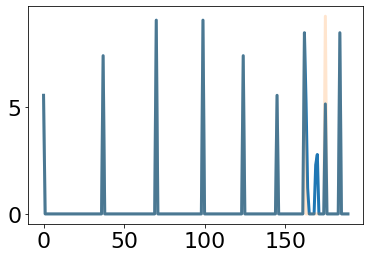

In [42]:
# def main():
#     b = np.arange(0,1,0.01)
    b = np.linspace(0,1,100)

    fermi = FermiGoldenRule

    H = list(map(fermi.hamiltonian,b)) # Get spin hamiltonian
    Hds = fermi.zeeman(1) # Get perturbation hamiltonian

    evecs = [np.linalg.eig(H)[1][i] for i in range(len(b))]
    evals = [np.linalg.eig(H)[0][i] for i in range(len(b))]
    
    eran = list(range(0,len(Hds)))
    eiter = list(combinations(eran,2))

    gamma_func = lambda i,f : 1e24 * abs ( np.matmul(f.conjugate() , np.matmul(Hds, i)) )
    gammas = [[gamma_func(evecs[x][:,eiter[i][0]],evecs[x][:,eiter[i][1]])
               for i in range(len(eiter))] for x in range(len(b))]

    indices = np.nonzero(np.array(gammas[0]))    
    esubs = [eiter[ind] for ind in indices[0]]    
    energy = [[abs(np.real(evals[bnum][esubs[ind][1]]) - np.real(evals[bnum][esubs[ind][0]])) for bnum in range(len(b))] for ind in range(len(esubs))]
    
    np.set_printoptions(suppress=False,precision=3)
    plt.plot(np.array(gammas[0]))
    plt.plot(np.load('james.npy'),alpha=.2)
    plt.show()
#     from matplotlib import pyplot as plt
#     [plt.plot(b,e) for e in energy]
#     plt.show()

#     from matplotlib import pyplot as plt
#     plt.plot(gammas[0])
#     plt.show()

# if __name__ == "__main__":
#     main()

In [83]:
# [np.unique(gam) for gam in gammas]
gam = list(itertools.chain.from_iterable(gammas))
gam = list(filter(lambda a: a != 0, gam))
np.shape(gam)[0]/14


106.57142857142857

In [154]:
np.set_printoptions(suppress=False,precision=8)

x = np.real(evecs[0][:,eiter[0][0]])
y = np.real(evecs[0][:,eiter[0][1]])

print(f"{np.real(evecs[0][:,eiter[0][0]])}")
print('\n')
print(f"{np.real(evecs[0][:,eiter[0][1]])}")
print('\n')
print(1e24*np.abs(np.matmul(y,np.matmul(Hds,x))))

[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.31622777 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.9486833  -0.        ]


[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.9486833  -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.31622777 -0.        ]


5.563912134086714


In [167]:
# np.matmul(y.conjugate(),Hds)
np.matmul(Hds,x)
# np.matmul(y.conjugate(),np.matmul(Hds,x))

array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        2.92660301e-24+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
       -8.81482601e-24+0.j,  0.00000000e+00+0.j])

In [171]:
f = np.load('f.npy')
i = np.load('i.npy')
Hdr = np.load('H_drive.npy')

In [182]:
# Hds - (Hdr/h/1e09)
np.set_printoptions(suppress=False,precision=2)
print(np.real(Hdr/h/1e09))

[[ 14.03   0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    14.02   0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    14.02   0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.    14.01   0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.    14.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.    14.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.    13.99   0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]

In [183]:
print(np.real(Hds.transpose()/h/1e09))

[[-13.97   0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    14.02   0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.   -13.98   0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.    14.01   0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.   -14.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.    14.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.   -14.01   0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]

In [197]:
esubs = [[eiter[i] for i in list(np.where(np.array(gammas[j])>0.0)[0])]for j in range(len(gammas))]

In [153]:
# [evals[0][esubs[i][1]] - evals[0][esubs[i][0]] for i in range(len(esubs[0]))]

In [176]:
ax = [[evals[x][esubs[x][i][1]] - evals[x][esubs[x][i][0]] for x in range(len(b))] for i in range(len(esubs[0]))]
# np.shape(ax)
# ax = [np.sort(ax[i]) for i in range(np.shape(ax)[0])]

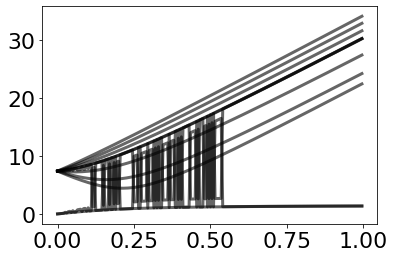

In [175]:
from matplotlib import pyplot as plt
plt.plot(b, ax[0],'k',alpha=.6)
plt.plot(b, ax[1],'k',alpha=.6)
plt.plot(b, ax[2],'k',alpha=.6)
plt.plot(b, ax[3],'k',alpha=.6)
plt.plot(b, ax[4],'k',alpha=.6)
plt.plot(b, ax[5],'k',alpha=.6)
plt.plot(b, ax[6],'k',alpha=.6)
plt.plot(b, ax[7],'k',alpha=.6)
plt.plot(b, ax[8],'k',alpha=.6)
plt.plot(b, ax[9],'k',alpha=.6)
plt.plot(b, ax[10],'k',alpha=.6)
# [plt.plot(b, ax[i]) for i in range(np.shape(ax)[0])]
plt.show()

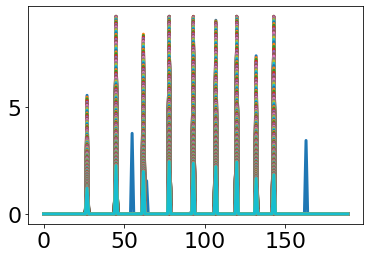

In [14]:
[plt.plot(gammas[i]) for i in range(len(gammas))]
plt.show()

TypeError: 'int' object is not iterable

In [34]:
np.shape(evecs)

(2, 20, 20)

In [33]:
for n in range(len(Hds)):
    evecs[n]
#     for m in range(n+1,len(evecs[0][0])):
#         print(f"n={n},m={m}")
        # i = evecs[n][:,n]
#         f = evecs[n][:,m]
#         gamma = gamma_func(i,f)
#         print(f"{gamma}")
            
#         if gamma > 0 :
#             Ef = np.real(eigvec[1][m])/h/1E9
#             Ei = np.real(eigvec[1][n])/h/1E9
#             E=(np.abs(Ef-Ei))
#             Es.append([E,gamma,Ef,Ei])
#             #print(Ef,Ei)

IndexError: list index out of range

In [15]:
evecs[0][:,19]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])